<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/1.AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### 1. Введение в AdaBoost
##### 1.1 Основы
AdaBoost (Адаптивное усиление) — это метод, который комбинирует множество слабых классификаторов для построения одного сильного классификатора.

**Входные данные:**
- Набор слабых классификаторов: $\{\phi_\mu(x) : \mu = 1, ..., M\}$.
- Множество помеченных данных: $X = \{(x_i, y_i) : i = 1, ..., N\}$, где $y_i \in \{-1, +1\}$.

**Выходные данные:**
Сильный классификатор:
$$
S(x) = \text{sign}\left(\sum_{\mu=1}^M \lambda_\mu \phi_\mu(x)\right),
$$
где $\{\lambda_\mu\}$ — это веса, которые нужно обучить.

**Цель:**
Мы стремимся к тому, чтобы большинство весов $\lambda_\mu$ были равны нулю, что означает, что соответствующие слабые классификаторы $\phi_\mu(.)$ не будут использоваться.

**Примечание:** Сильный классификатор представляет собой плоскость в пространстве признаков (см. рисунок 1).




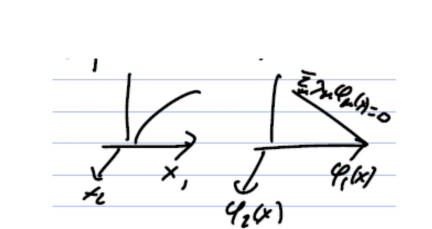


*Рисунок 1: AdaBoost обучает сильный классификатор, который является плоскостью в пространстве признаков.*


### 1.2 Мотивация

Задача AdaBoost заключается в выборе весов $\{\lambda_\mu\}$ для построения сильного классификатора с максимально возможной производительностью.

Мотивация заключается в том, что часто можно определить слабые классификаторы для конкретной задачи. Например, можно найти "слабый классификатор", который работает правильно в 60% случаев. В более общем случае можно задать большой набор слабых классификаторов, из которого AdaBoost выберет ограниченное количество для построения сильного классификатора, работающего правильно в 99,9% случаев.

**Почему слабые классификаторы объединяются с помощью линейных весов?**  
Это связано с тем, что существует эффективный алгоритм для этой цели, и потому что полученный классификатор хорошо обобщается даже при ограниченном объеме данных (как всегда, используется кросс-валидация, чтобы убедиться, что AdaBoost не переобучается).

Следует отметить, что слабые классификаторы, которые работают правильно только в 40% случаев, все равно могут быть полезны. Изменяя их знак, можно преобразовать такой классификатор в тот, который работает правильно в 55% случаев. (Если вы знаете человека, чьи советы обычно плохи, спросите его мнение и сделайте наоборот.)

"Оптимальный" способ комбинирования слабых классификаторов, при наличии достаточного количества данных, — это обучение распределения $P(y|\{\phi_\mu(x)\})$ — условного распределения $y$ при данных. Однако этот подход обычно требует гораздо больше данных, чем доступно на практике.



### 1.3 Пример: Обнаружение лиц

Обучающая выборка состоит из набора изображений $I$ (мы избегаем использования $x$, так как оно обозначает позицию внутри изображения). Каждое изображение помечено как "лицо" ($y = 1$) или "не лицо" ($y = -1$) (см. Рисунок 2).

Виола и Джонс вычисляли признаки изображений $f(I)$. Например, они рассчитывали среднюю интенсивность в различных подобластях изображений и вычитали эти средние значения для получения признака $f(I)$. Слабый классификатор получался путем применения порога к значению признака (например, установите $y = 1$, если $f(I) > T$). Например, область лба обычно намного ярче области прямо под ней (бровей и глаз), что дает нам слабый классификатор, применяя порог к величине этой разницы. Аналогично, лица часто симметричны, поэтому средняя интенсивность с одной стороны лица обычно близка к интенсивности с другой стороны — значит, разница между этими средними значениями часто меньше порога.


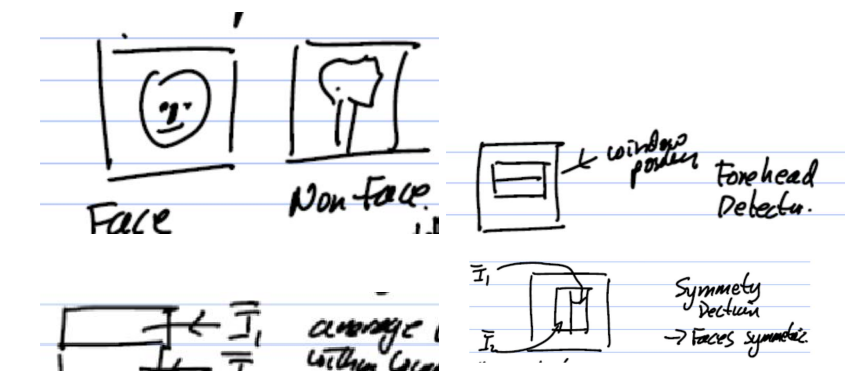


**Рисунок 2:** Задача обнаружения лиц (левая панель). Слабые классификаторы для обнаружения лиц (правые панели).

Виола и Джонс задали большой набор слабых классификаторов этого типа ($M = 20,000$).  
**Примечание:** AdaBoost даст хорошие результаты только если у вас есть качественный набор слабых классификаторов.


### 2 Математическое описание

#### 2.1 Выпуклая верхняя граница эмпирического риска

Пусть
$$
Z[\lambda_1, ..., \lambda_M] = \sum_{i=1}^N \exp\left(-y_i \sum_{\mu=1}^M \lambda_\mu \phi_\mu(x_i)\right).
$$

Это выпуклая верхняя граница эмпирического риска сильного классификатора $S(\cdot)$. Выпуклость можно доказать, вычислив гессиан и показав, что он положительно определён (неравенство Коши-Шварца).

Чтобы доказать, что это верхняя граница эмпирического риска (штрафующего все ошибки одинаково), вспомним, что эмпирический риск сильного классификатора $S(\cdot)$ задаётся следующим образом:
$$
R_{\text{emp}}(X) = \sum_{i=1}^N \left(1 - I(S(x_i) = y_i)\right),
$$
где $I(\cdot)$ — индикаторная функция.

Для доказательства сравним эти два уравнения почленно. Члены в эмпирическом риске принимают значение $1$, если $S(x_i) \neq y_i$ (если сильный классификатор ошибается), и значение $0$, если $S(x_i) = y_i$ (если сильный классификатор даёт правильный ответ).

**Математический факт:** $y_i S(x_i) = 1$, если сильный классификатор прав, и $y_i S(x_i) = -1$, если сильный классификатор ошибается. Этот факт полезен при обсуждении AdaBoost и методов максимизации отступа (например, методов опорных векторов) на следующей лекции.

Теперь рассмотрим члены $\exp\left(-y_i \sum_{\mu=1}^M \lambda_\mu \phi_\mu(x_i)\right)$ в $Z[\lambda_1, ..., \lambda_M]$. Если сильный классификатор ошибается ($S(x_i) \neq y_i$), то $y_i$ и $\sum_{\mu=1}^M \lambda_\mu \phi_\mu(x_i)$ должны иметь разные знаки. Это означает, что $y_i \sum_{\mu=1}^M \lambda_\mu \phi_\mu(x_i) < 0$, следовательно, $\exp\left(-y_i \sum_{\mu=1}^M \lambda_\mu \phi_\mu(x_i)\right) > 1$. Если сильный классификатор прав, то соответствующий член больше нуля, так как он экспоненциальный. Таким образом, каждый член в $Z$ больше или равен соответствующему члену в эмпирическом риске.

**Примечание:** это стандартная техника в машинном обучении. Эмпирический риск является невыпуклой функцией параметров $\lambda$ сильного классификатора. Однако мы можем ограничить его выпуклой функцией $Z$. Это позволяет нам задать алгоритм, который гарантированно сходится к глобальному минимуму $Z$, что даёт верхнюю границу для эмпирического риска. (Это не означает, что мы минимизировали эмпирический риск, но это означает, что мы знаем, что он ниже минимума $Z$).


### 2.2 Метод покоординатного спуска

Алгоритм AdaBoost можно представить как метод покоординатного спуска в $Z$ (хотя изначально он не был описан таким образом), см. Рисунок 3.

**Инициализация:** $\lambda_\mu = 0$, для $\mu = 1, ..., M$.  
На временном шаге $t$ предположим, что текущие веса равны $\{\lambda_t : \mu = 1, ..., M\}$.

Для каждого $\mu$ минимизируем $Z$ относительно $\lambda_\mu$, фиксируя остальные $\lambda$. То есть решаем уравнение:
$$
\frac{\partial Z}{\partial \lambda_\mu} = 0
$$
(так как $Z$ выпукла, решение будет единственным) и находим $\hat{\lambda}_\mu$. Затем вычисляем:
$$
Z[\lambda_t^1, ..., \hat{\lambda}_\mu, ..., \lambda_t^M].
$$
Это даёт уменьшение $Z$, полученное при минимизации по $\mu$-му $\lambda$. (Как это сделать, описано в следующем разделе).

Затем вычисляем:
$$
\hat{\mu} = \arg\min Z[\lambda_t^1, ..., \hat{\lambda}_\mu, ..., \lambda_t^M].
$$
(То есть находим $\mu$, для которого $Z$ уменьшается максимально). После этого обновляем веса:
$$
\lambda_{t+1}^{\hat{\mu}} = \hat{\lambda}_{\hat{\mu}}, \quad \lambda_{t+1}^\mu = \lambda_t^\mu, \text{ для всех } \mu \neq \hat{\mu}.
$$




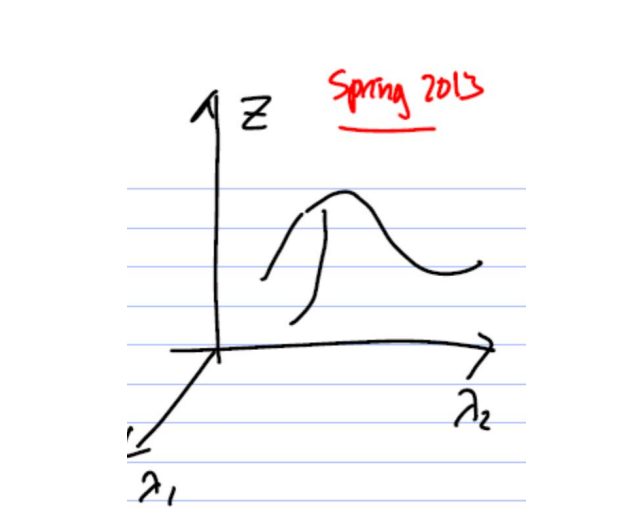


**Рисунок 3:** AdaBoost выполняет покоординатный спуск в $Z$. На каждом временном шаге вычисляется наилучшее направление для максимального уменьшения $Z$ — то есть выбирается $\hat{\mu}$ — и затем происходит движение в этом направлении.

Повторяем процесс до тех пор, пока $Z$ перестанет уменьшаться.  

**Примечание:** это может привести к переобучению данных. На практике следует остановиться раньше и проверить результат с помощью кросс-валидации.

**Интуиция.** На каждом временном шаге вычисляется, насколько можно уменьшить $Z$, изменяя только одно из значений $\lambda$, и выбирается то $\lambda$, которое даёт наибольшее уменьшение. Каждый шаг алгоритма уменьшает $Z$, и поэтому алгоритм сходится к (единственному) глобальному минимуму $Z$.

**Примечание:** этот алгоритм является практичным только потому, что мы можем эффективно решать для $\hat{\lambda}_\mu$ и для $\hat{\mu}$, как описано в следующем разделе. **Примечание:** как только один слабый классификатор выбран, он может быть выбран снова на последующих шагах.


### 3 Алгоритм AdaBoost

Для каждого слабого классификатора $\phi_\mu(\cdot)$ разделим данные на два множества:
1. $W^+ = \{i : y_i \phi_\mu(x_i) = 1\}$,
2. $W^- = \{i : y_i \phi_\mu(x_i) = -1\}$.

То есть $W^+$ — это множество данных, которые $\phi_\mu(\cdot)$ классифицирует правильно, а $W^-$ — множество данных, которые он классифицирует неправильно.

Затем, на каждом временном шаге $t$, определяем набор "весов" для обучающих данных:

$$
D_i^t = \frac{\exp\left(-y_i \sum_{\mu=1}^M \lambda_\mu^t \phi_\mu(x_i)\right)}{\sum_{j=1}^N \exp\left(-y_j \sum_{\mu=1}^M \lambda_\mu^t \phi_\mu(x_j)\right)}.
$$

Эти веса положительны и в сумме дают 1: $\sum_{i=1}^N D_i^t = 1$. При $t = 0$ все веса равны $1/N$. В противном случае наибольшие веса соответствуют данным, которые текущий сильный классификатор $sign\left(\sum_{\mu=1}^M \lambda_\mu^t \phi_\mu(x_i)\right)$ (наша текущая оценка сильного классификатора) классифицирует неправильно, а наименьшие — тем, что классифицируются правильно (чтобы увидеть это, посмотрите на знак экспоненты). Эти веса учитывают уже выбранные слабые классификаторы и их веса при попытке добавить новый классификатор.

Теперь опишем алгоритм AdaBoost, явно показывая, как вычислить шаги, кратко описанные в предыдущем разделе.



#### Инициализация:
$\lambda_\mu = 0$, для $\mu = 1, ..., M$.

На временном шаге $t$, пусть текущие веса равны $\{\lambda_\mu^t : \mu = 1, ..., M\}$. Затем для каждого $\mu$ вычисляем:

$$
\Delta_\mu = \frac{1}{2} \log \frac{\sum_{i \in W^+} D_i^t}{\sum_{i \in W^-} D_i^t}.
$$

(Это соответствует решению уравнения $\partial Z / \partial \lambda_\mu = 0$, см. следующий раздел).

Затем находим:

$$
\hat{\mu} = \arg\min_\mu \frac{\sum_{i \in W^+} D_i^t}{\sum_{i \in W^-} D_i^t}.
$$

(Это вычисляет изменение $Z$ и выбирает $\mu$, для которого это изменение максимально).

Затем обновляем веса:

$$
\lambda_{\hat{\mu}}^{t+1} = \lambda_{\hat{\mu}}^t + \Delta_{\hat{\mu}}, \quad \lambda_\mu^{t+1} = \lambda_\mu^t, \text{ для всех } \mu \neq \hat{\mu}.
$$

Повторяем процесс до сходимости.

Сходимость достигается, когда величина $\sum_{i \in W^+} D_i^t \cdot \sum_{i \in W^-} D_i^t$ достигает своего максимального значения $1/2$ для всех $\mu$. (Чтобы увидеть, что это максимальное возможное значение, заметим, что $\sum_{i \in W^+} D_i^t + \sum_{i \in W^-} D_i^t = 1$). Это эквивалентно условию $\sum_{i \in W^+} D_i^t = \sum_{i \in W^-} D_i^t = 1/2$. (Обратите внимание, если веса равны $1/N$ — в начале алгоритма — то это условие означает, что слабый классификатор прав в 50% случаев).

### 4 Эквивалентность между математическим и алгоритмическим описанием

Опустим верхний индекс $t$, так как следующее рассуждение применимо к любому шагу.

Установим $\lambda_\mu = \lambda_\mu + \Delta_\mu$ и решим для $\Delta_\mu$:

$$
\frac{\partial Z}{\partial \lambda_\mu} = \sum_{i=1}^N \left(-y_i \phi_\mu(x_i)\right) e^{-y_i \sum_{\mu=1}^M \lambda_\mu \phi_\mu(x_i)} = 0.
$$

Это можно переписать как (используя определение $D_i$ и разделив обе стороны на $\sum_i e^{-y_i \sum_{\mu=1}^M \lambda_\mu \phi_\mu(x_i)}$):

$$
\sum_{i=1}^N \left(y_i \phi_\mu(x_i)\right) D_i e^{-y_i \Delta_\mu \phi_\mu(x_i)} = 0.
$$

Используя определения множеств $W^+$ и $W^-$, это уравнение можно выразить как:

$$
\sum_{i \in W^+} D_i e^{-\Delta_\mu} - \sum_{i \in W^-} D_i e^{\Delta_\mu} = 0.
$$

Решая это уравнение, получаем:

$$
\Delta_\mu = \frac{1}{2} \log \frac{\sum_{i \in W^+} D_i}{\sum_{i \in W^-} D_i}.
$$

Теперь вычислим $Z[\lambda_1, ..., \lambda_\mu + \Delta_\mu, ..., \lambda_M]$:

$$
Z[\lambda_1, ..., \lambda_\mu + \Delta_\mu, ..., \lambda_M] = \sum_{i=1}^N e^{-y_i \left(\sum_{\mu=1}^M \lambda_\mu \phi_\mu(x_i) + \Delta_\mu \phi_\mu(x_i)\right)}.
$$

Это можно записать как:

$$
Z[\lambda_1, ..., \lambda_\mu + \Delta_\mu, ..., \lambda_M] = K \sum D_i e^{-y_i \Delta_\mu \phi_\mu(x_i)},
$$

где $K = \sum_{i=1}^N e^{-y_i \sum_{\mu=1}^M \lambda_\mu \phi_\mu(x_i)}$ не зависит от $\mu$. Следовательно:

$$
Z[\lambda_1, ..., \lambda_\mu + \Delta_\mu, ..., \lambda_M] = K \left(\sum_{i \in W^+} D_i e^{-\Delta_\mu} + \sum_{i \in W^-} D_i e^{\Delta_\mu}\right).
$$

Это выражение можно упростить до:

$$
Z[\lambda_1, ..., \lambda_\mu + \Delta_\mu, ..., \lambda_M] = 2K \sqrt{\sum_{i \in W^+} D_i \cdot \sum_{i \in W^-} D_i}.
$$

Это доказывает эквивалентность между математическим и алгоритмическим описаниями AdaBoost.



### 5 Дальнейшее обсуждение

#### 5.1 AdaBoost и регрессия

Было показано (Фридман, Хасти, Тибширани), что AdaBoost асимптотически сходится к решению задачи регрессии:

$$
P(y|x) = \frac{e^{y \sum_\mu \lambda_\mu \phi_\mu(x)}}{e^{\sum_\mu \lambda_\mu \phi_\mu(x)} + e^{-\sum_\mu \lambda_\mu \phi_\mu(x)}}.
$$

Это справедливо только в пределе, когда объем данных стремится к бесконечности (плюс другие технические условия).

Было высказано мнение (Миллер, Ливанон и другие), что выполнение регрессии дает лучшие результаты, чем AdaBoost. Однако это требует больше вычислительных ресурсов. Также необходимо обеспечить ограничение разреженности, чтобы большинство $\lambda$ были равны нулю (см. лекцию о разреженности).



#### 5.2 Преимущества AdaBoost

Главное преимущество AdaBoost заключается в том, что можно задать большой набор слабых классификаторов, и алгоритм сам решает, какие из них использовать, назначая им ненулевые веса.

Классическая логистическая регрессия использует лишь небольшое количество признаков.

Метод опорных векторов (SVM) использует "трюк с ядром" (будет обсуждаться на следующей лекции), чтобы упростить зависимость от $\phi(x)$, но не говорит, как выбрать ядро или $\phi$.

Многослойный персептрон можно интерпретировать как выбор слабых классификаторов, но делается это неоптимальным образом.


Давайте разберем конкретный числовой пример работы алгоритма AdaBoost шаг за шагом. Мы будем использовать простой набор данных с двумя признаками и три слабых классификатора.



### **Исходные данные**
1. **Обучающая выборка**:
   - $X = \{(x_1, y_1), (x_2, y_2), (x_3, y_3), (x_4, y_4)\}$,
   - где $x_i$ — это признаки, а $y_i \in \{-1, +1\}$ — метки классов.
   - Пример:
     $$
     X = \{(1, 1), (2, -1), (3, -1), (4, 1)\}.
     $$

2. **Слабые классификаторы**:
   - $\phi_1(x)$: Классифицирует как $+1$, если $x < 2.5$, иначе $-1$.
   - $\phi_2(x)$: Классифицирует как $+1$, если $x < 3.5$, иначе $-1$.
   - $\phi_3(x)$: Классифицирует как $+1$, если $x > 1.5$, иначе $-1$.

3. **Цель**:
   - Построить сильный классификатор:
     $$
     S(x) = \text{sign}\left(\sum_{\mu=1}^M \lambda_\mu \phi_\mu(x)\right).
     $$



### **Шаг 1: Инициализация весов**
Начальные веса для каждого примера равны:
$$
D_i^0 = \frac{1}{N}, \quad i = 1, ..., N.
$$
Здесь $N = 4$, поэтому:
$$
D_1^0 = D_2^0 = D_3^0 = D_4^0 = \frac{1}{4}.
$$



### **Шаг 2: Первый временной шаг ($t = 1$)**

#### 2.1 Вычисление ошибок слабых классификаторов
Для каждого слабого классификатора $\phi_\mu(x)$ вычислим ошибку на текущем распределении весов $D_i^t$:
$$
\varepsilon_\mu = \sum_{i \in W^-} D_i^t,
$$
где $W^-$ — множество примеров, которые $\phi_\mu(x)$ классифицирует неправильно.

- Для $\phi_1(x)$:
  - $\phi_1(x) = +1$, если $x < 2.5$, иначе $-1$.
  - Примеры:
    - $x_1 = 1$: $\phi_1(x_1) = +1$, $y_1 = +1$ (правильно),
    - $x_2 = 2$: $\phi_1(x_2) = +1$, $y_2 = -1$ (неправильно),
    - $x_3 = 3$: $\phi_1(x_3) = -1$, $y_3 = -1$ (правильно),
    - $x_4 = 4$: $\phi_1(x_4) = -1$, $y_4 = +1$ (неправильно).
  - Ошибка:
    $$
    \varepsilon_1 = D_2^0 + D_4^0 = \frac{1}{4} + \frac{1}{4} = \frac{1}{2}.
    $$

- Для $\phi_2(x)$:
  - $\phi_2(x) = +1$, если $x < 3.5$, иначе $-1$.
  - Примеры:
    - $x_1 = 1$: $\phi_2(x_1) = +1$, $y_1 = +1$ (правильно),
    - $x_2 = 2$: $\phi_2(x_2) = +1$, $y_2 = -1$ (неправильно),
    - $x_3 = 3$: $\phi_2(x_3) = +1$, $y_3 = -1$ (неправильно),
    - $x_4 = 4$: $\phi_2(x_4) = -1$, $y_4 = +1$ (неправильно).
  - Ошибка:
    $$
    \varepsilon_2 = D_2^0 + D_3^0 + D_4^0 = \frac{1}{4} + \frac{1}{4} + \frac{1}{4} = \frac{3}{4}.
    $$

- Для $\phi_3(x)$:
  - $\phi_3(x) = +1$, если $x > 1.5$, иначе $-1$.
  - Примеры:
    - $x_1 = 1$: $\phi_3(x_1) = -1$, $y_1 = +1$ (неправильно),
    - $x_2 = 2$: $\phi_3(x_2) = +1$, $y_2 = -1$ (неправильно),
    - $x_3 = 3$: $\phi_3(x_3) = +1$, $y_3 = -1$ (неправильно),
    - $x_4 = 4$: $\phi_3(x_4) = +1$, $y_4 = +1$ (правильно).
  - Ошибка:
    $$
    \varepsilon_3 = D_1^0 + D_2^0 + D_3^0 = \frac{1}{4} + \frac{1}{4} + \frac{1}{4} = \frac{3}{4}.
    $$

#### 2.2 Выбор лучшего слабого классификатора
Выбираем $\phi_\mu(x)$ с минимальной ошибкой:
$$
\hat{\mu} = \arg\min_\mu \varepsilon_\mu.
$$
Здесь:
$$
\varepsilon_1 = \frac{1}{2}, \quad \varepsilon_2 = \frac{3}{4}, \quad \varepsilon_3 = \frac{3}{4}.
$$
Лучший классификатор: $\phi_1(x)$.

#### 2.3 Вычисление веса $\alpha_1$
Вес для выбранного слабого классификатора вычисляется как:
$$
\alpha_1 = \frac{1}{2} \log \frac{1 - \varepsilon_1}{\varepsilon_1}.
$$
Подставляем $\varepsilon_1 = \frac{1}{2}$:
$$
\alpha_1 = \frac{1}{2} \log \frac{1 - \frac{1}{2}}{\frac{1}{2}} = \frac{1}{2} \log 1 = 0.
$$

#### 2.4 Обновление весов
Обновляем веса для каждого примера:
$$
D_i^{t+1} = \frac{D_i^t \cdot e^{-\alpha_t y_i \phi_{\hat{\mu}}(x_i)}}{Z_t},
$$
где $Z_t$ — нормализующий множитель:
$$
Z_t = \sum_{i=1}^N D_i^t \cdot e^{-\alpha_t y_i \phi_{\hat{\mu}}(x_i)}.
$$

Поскольку $\alpha_1 = 0$, веса не изменяются:
$$
D_1^1 = D_1^0, \quad D_2^1 = D_2^0, \quad D_3^1 = D_3^0, \quad D_4^1 = D_4^0.
$$



### **Шаг 3: Второй временной шаг ($t = 2$)**

#### 3.1 Вычисление ошибок слабых классификаторов
Аналогично шагу 2.1, вычисляем ошибки для оставшихся слабых классификаторов ($\phi_2(x)$ и $\phi_3(x)$).

#### 3.2 Выбор лучшего слабого классификатора
Выбираем классификатор с минимальной ошибкой.

#### 3.3 Вычисление веса $\alpha_2$
Вычисляем вес для выбранного классификатора:
$$
\alpha_2 = \frac{1}{2} \log \frac{1 - \varepsilon_2}{\varepsilon_2}.
$$

#### 3.4 Обновление весов
Обновляем веса аналогично шагу 2.4.



### **Итоговый сильный классификатор**
После нескольких итераций получаем сильный классификатор:
$$
S(x) = \text{sign}\left(\sum_{\mu=1}^M \alpha_\mu \phi_\mu(x)\right).
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(42)
X = np.array([1, 2, 3, 4])
y = np.array([1, -1, -1, 1])  # Метки классов

# Определение слабых классификаторов
def weak_classifier_1(x):
    return 1 if x < 2.5 else -1

def weak_classifier_2(x):
    return 1 if x < 3.5 else -1

def weak_classifier_3(x):
    return 1 if x > 1.5 else -1

weak_classifiers = [weak_classifier_1, weak_classifier_2, weak_classifier_3]

# Инициализация весов
D = np.ones(len(X)) / len(X)  # Начальные веса
alphas = []  # Веса слабых классификаторов
selected_classifiers = []  # Выбранные классификаторы

# AdaBoost алгоритм
for t in range(3):  # Количество итераций (шагов)
    print(f"\n--- Шаг {t + 1} ---")

    # Вычисление ошибок для каждого слабого классификатора
    errors = []
    for clf in weak_classifiers:
        predictions = np.array([clf(x) for x in X])
        error = np.sum(D[predictions != y])  # Взвешенная ошибка
        errors.append(error)

    # Выбор лучшего слабого классификатора
    best_clf_idx = np.argmin(errors)
    best_clf = weak_classifiers[best_clf_idx]
    error = errors[best_clf_idx]
    print(f"Лучший классификатор: {best_clf.__name__}, ошибка: {error:.4f}")

    # Вычисление веса для выбранного классификатора
    alpha = 0.5 * np.log((1 - error) / (error + 1e-10))  # Добавляем маленькое значение, чтобы избежать деления на ноль
    alphas.append(alpha)
    selected_classifiers.append(best_clf)
    print(f"Вес классификатора (alpha): {alpha:.4f}")

    # Обновление весов примеров
    predictions = np.array([best_clf(x) for x in X])
    D *= np.exp(-alpha * y * predictions)
    D /= np.sum(D)  # Нормализация
    print(f"Новые веса: {D}")

# Построение сильного классификатора
def strong_classifier(x):
    return np.sign(sum(alpha * clf(x) for alpha, clf in zip(alphas, selected_classifiers)))

# Визуализация
x_range = np.linspace(0, 5, 500)
y_pred = np.array([strong_classifier(x) for x in x_range])

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1], np.zeros_like(X[y == 1]), color='blue', label='Class +1')
plt.scatter(X[y == -1], np.zeros_like(X[y == -1]), color='red', label='Class -1')
plt.plot(x_range, y_pred, label='Strong Classifier', color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.title("AdaBoost Visualization")
plt.xlabel("Feature")
plt.ylabel("Prediction")
plt.legend()
plt.grid(True)
plt.show()